In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras 
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
from keras.datasets import cifar10
(X_train, _),(X_test, _) = cifar10.load_data()

In [9]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (50000, 32, 32, 3)
X_test shape:  (10000, 32, 32, 3)


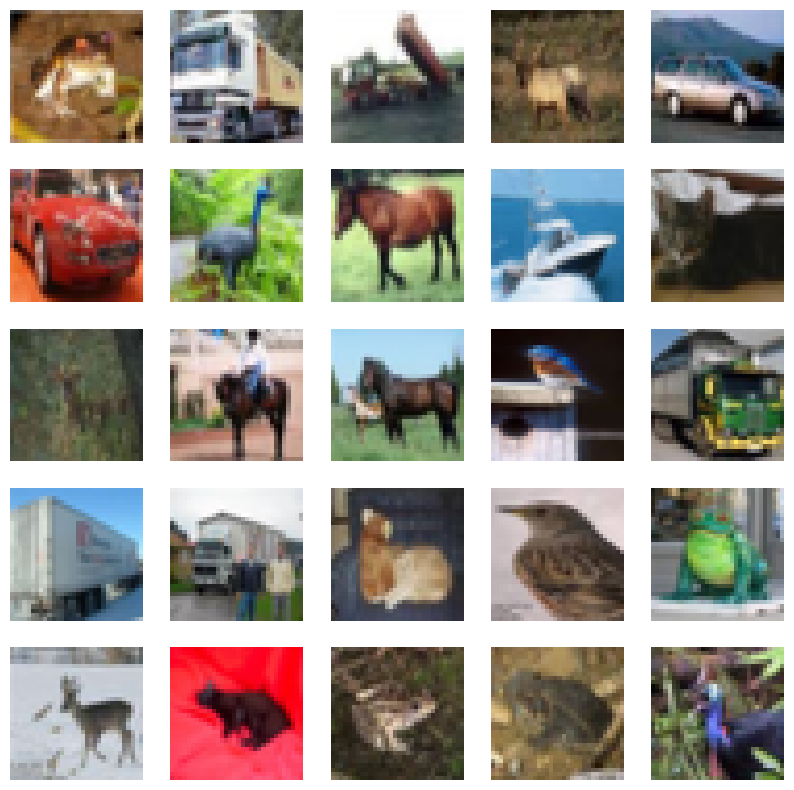

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i])
    plt.axis("off")
plt.show()

In [11]:
X_train= X_train.astype("float32")/255
X_test= X_test.astype("float32")/255

In [12]:

noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

# Clip the pixel values between 0 and 1
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# To be used to define the denoising autoencoder architecture
input_shape = X_train_noisy[0].shape

In [13]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MeanSquaredError

# Encoder
inputs = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Create the autoencoder model
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss=MeanSquaredError())

In [25]:

epochs = 10
batch_size = 32

autoencoder.fit(X_train_noisy, X_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
1563/1563 [==============================] - 161s 103ms/step - loss: 0.0102
Epoch 2/10
1563/1563 [==============================] - 143s 91ms/step - loss: 0.0101
Epoch 3/10
1563/1563 [==============================] - 129s 83ms/step - loss: 0.0101
Epoch 4/10
1563/1563 [==============================] - 118s 75ms/step - loss: 0.0100
Epoch 5/10
 788/1563 [==============>...............] - ETA: 8:53:47 - loss: 0.0100

KeyboardInterrupt: 

In [ ]:
# Denoise a few test images and print the original, noisy, and denoised images
num_samples = 5

for i in range(num_samples):
    # Select a random test image
    index = np.random.randint(0, len(X_test_noisy))
    test_image_noisy = np.expand_dims(X_test_noisy[index], axis=0)

    # Denoise the test image
    denoised_image = autoencoder.predict(test_image_noisy)

    # Rescale pixel values to 0-255 range for visualization
    test_image_noisy = test_image_noisy[0] * 255.
    denoised_image = denoised_image[0] * 255.

    # Convert images to uint8 data type
    test_image_noisy = test_image_noisy.astype(np.uint8)
    denoised_image = denoised_image.astype(np.uint8)

    # Plot the original, noisy, and denoised images
    plt.figure(figsize=(12, 6))
    # plt.subplot(1, 3, 1)
    # plt.imshow(X_test[index])
    # plt.title('Original')
    # plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(test_image_noisy)
    plt.title('Noisy')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(denoised_image)
    plt.title('Denoised')
    plt.axis('off')

    plt.show()